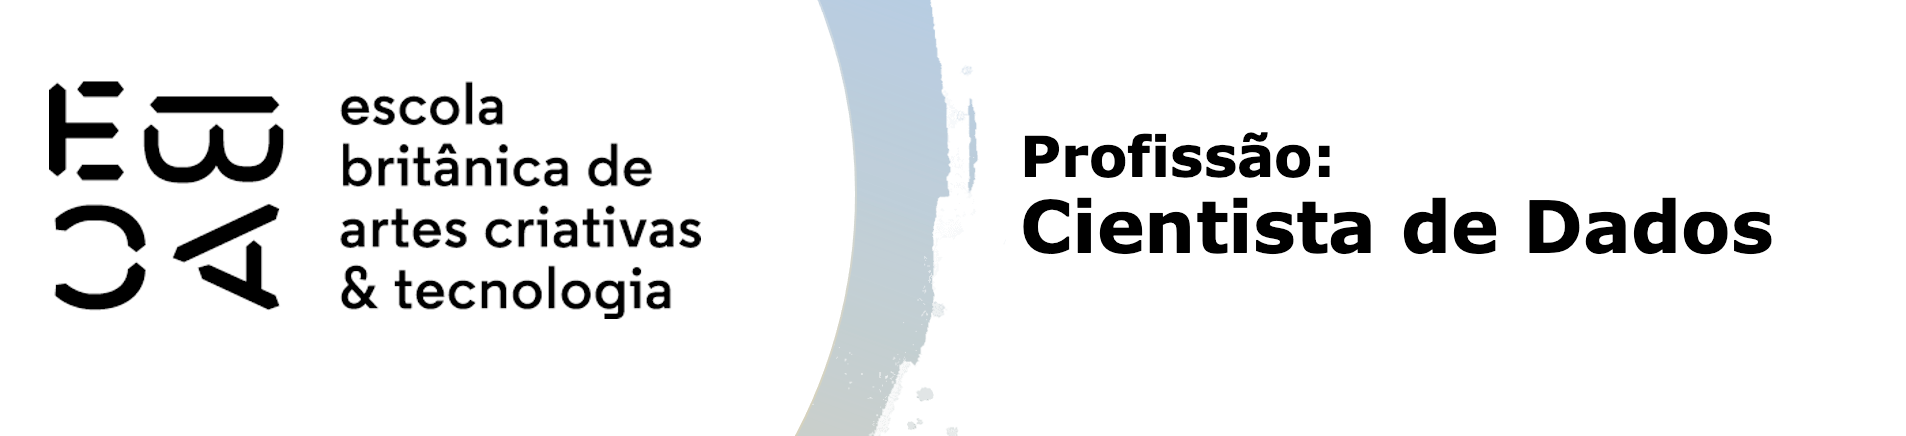

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [8]:
df.columns

Index(['CNPJ emit.', 'Emitente', 'No.', 'Data Emissão', 'Valor NF',
       'Data Registro', 'Créditos', 'Situação do Crédito', 'Ano', 'Semestre',
       'Retorno', 'flag_credito', 'categoria'],
      dtype='object')

In [40]:
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])
df_2020 = df[df['Data Emissão'] >= '2020-01-01']
tab =  pd.crosstab(df_2020.categoria, df_2020.flag_credito > 0)
tab

flag_credito,False,True
categoria,,
Alimentos,1608,3442
Auto posto,405,135
Construção,8524,7523
Farmácia,6607,3582
Mercado,14381,13177
Restaurantes,553,1626
Varejo,4365,701
Vestuário,1477,443
não definido,11718,6689


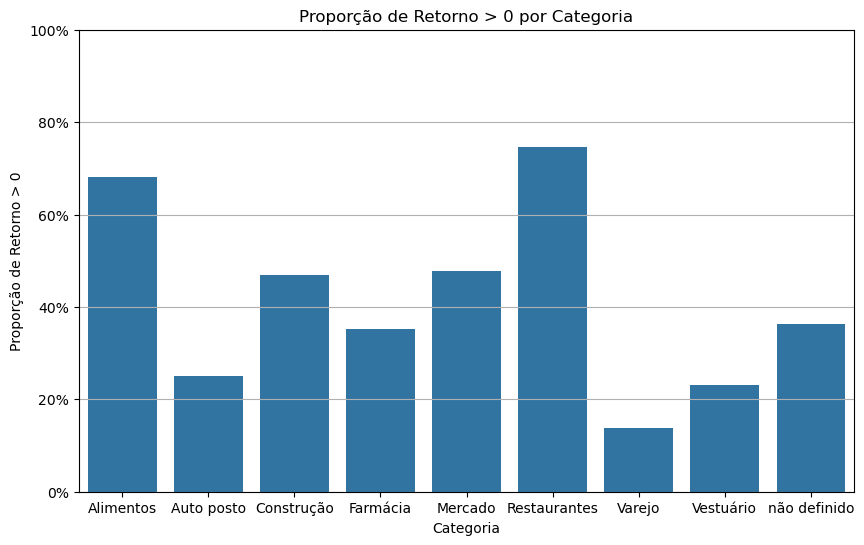

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=proporcoes, x='categoria', y='flag_credito')
plt.ylabel('Proporção de Retorno > 0')
plt.xlabel('Categoria')
plt.title('Proporção de Retorno > 0 por Categoria')
plt.ylim(0, 1)  # Define o limite do eixo y de 0 a 1 para representar porcentagens
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))  # Formatar eixo y como porcentagem
plt.grid(axis='y')

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [12]:
tab2 =  pd.crosstab(df_2020.categoria, df_2020.flag_credito > 0, margins=True, margins_name='total')
tab2

flag_credito,False,True,total
categoria,,,
Alimentos,1608,3442,5050
Auto posto,405,135,540
Construção,8524,7523,16047
Farmácia,6607,3582,10189
Mercado,14381,13177,27558
Restaurantes,553,1626,2179
Varejo,4365,701,5066
Vestuário,1477,443,1920
não definido,11718,6689,18407


In [13]:
tab2['pct_nao_evento'] = tab2[0]/tab2.loc['total',0]
tab2['pct_evento']     = tab2[1]/tab2.loc['total',1]
tab2

flag_credito,False,True,total,pct_nao_evento,pct_evento
categoria,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234
Auto posto,405,135,540,0.008159,0.003618
Construção,8524,7523,16047,0.171723,0.201592
Farmácia,6607,3582,10189,0.133104,0.095986
Mercado,14381,13177,27558,0.289718,0.353100
Restaurantes,553,1626,2179,0.011141,0.043571
Varejo,4365,701,5066,0.087937,0.018785
Vestuário,1477,443,1920,0.029755,0.011871
não definido,11718,6689,18407,0.236069,0.179243


In [14]:
tab2['RC'] = tab2['pct_evento']/tab2['pct_nao_evento']
tab2['WOE'] = np.log(tab2['pct_evento']/tab2['pct_nao_evento'])
tab2

flag_credito,False,True,total,pct_nao_evento,pct_evento,RC,WOE
categoria,,,,,,,
Alimentos,1608,3442,5050,0.032395,0.092234,2.847218,1.046342
Auto posto,405,135,540,0.008159,0.003618,0.443379,-0.813331
Construção,8524,7523,16047,0.171723,0.201592,1.173934,0.160360
Farmácia,6607,3582,10189,0.133104,0.095986,0.721136,-0.326928
Mercado,14381,13177,27558,0.289718,0.353100,1.218775,0.197846
Restaurantes,553,1626,2179,0.011141,0.043571,3.911032,1.363801
Varejo,4365,701,5066,0.087937,0.018785,0.213614,-1.543585
Vestuário,1477,443,1920,0.029755,0.011871,0.398951,-0.918918
não definido,11718,6689,18407,0.236069,0.179243,0.759283,-0.275381


In [15]:
tab2.drop(columns='total', index='total', inplace=True)


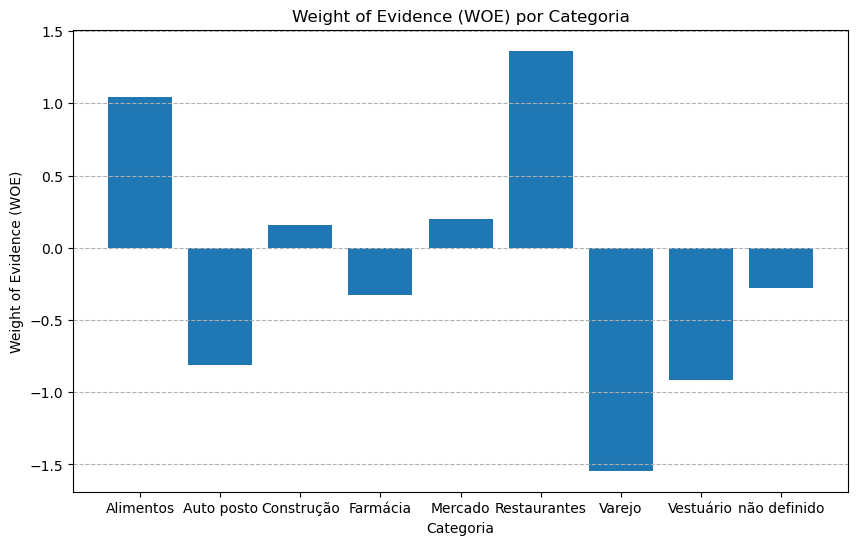

In [86]:
plt.figure(figsize=(10, 6))
plt.bar(tab2.index, tab2.WOE)
plt.ylabel('Weight of Evidence (WOE)')
plt.xlabel('Categoria')
plt.title('Weight of Evidence (WOE) por Categoria')
# plt.ylim(0, 1)  # Define o limite do eixo y de 0 a 1 para representar porcentagens
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))  # Formatar eixo y como porcentagem
plt.grid(axis='y', linestyle='--')
plt.show()

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [88]:
tab2['IV'] = (tab2.pct_evento - tab2.pct_nao_evento)*tab2.WOE
IV = tab2.IV.sum()
print(f'Information Value: {IV.round(3)}')


Information Value: 0.279


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


### Conclusão
<span style="color:blue">
> - Analisando o gráfico acima, podemos afirmar que as categorias **"Alimentos"**, **"Construção"**, **"Mercado"** e **"Restaurantes"** são as mais suscetíveis a direcionar seus créditos à AMA. Dentre elas, **"Restaurantes"** e **"Alimentos"** apresentam a maior probabilidade de direcionamento.<br>  
> - A análise do IV (Information Value) revela um valor de **0,28**, o que pode ser interpretado como um nível de poder preditivo médio da variável **"categoria"** sobre o retorno de créditos.
</span>